Question 1: Which industries showed the highest growth in stock prices during the observed period?

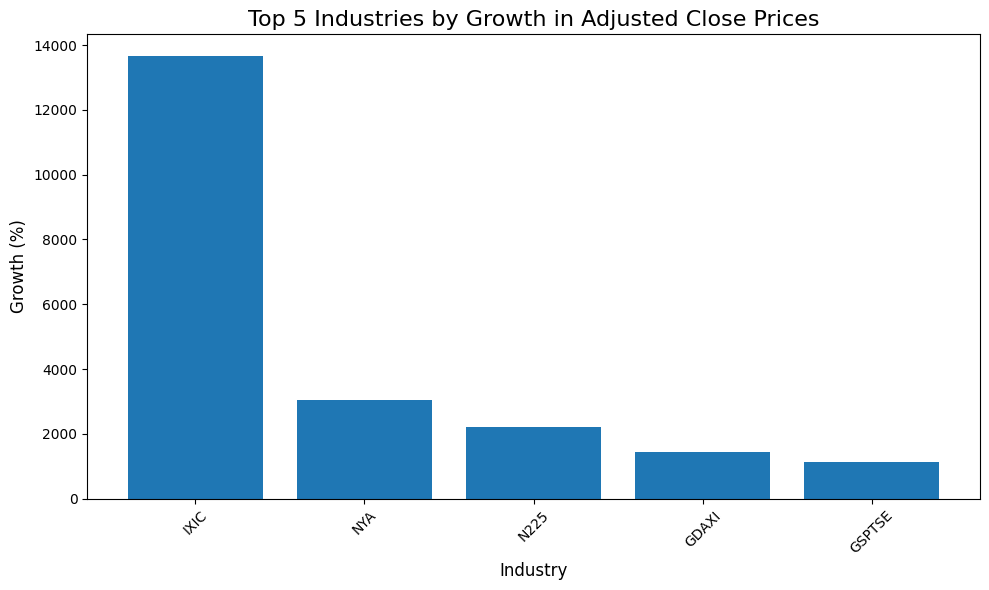

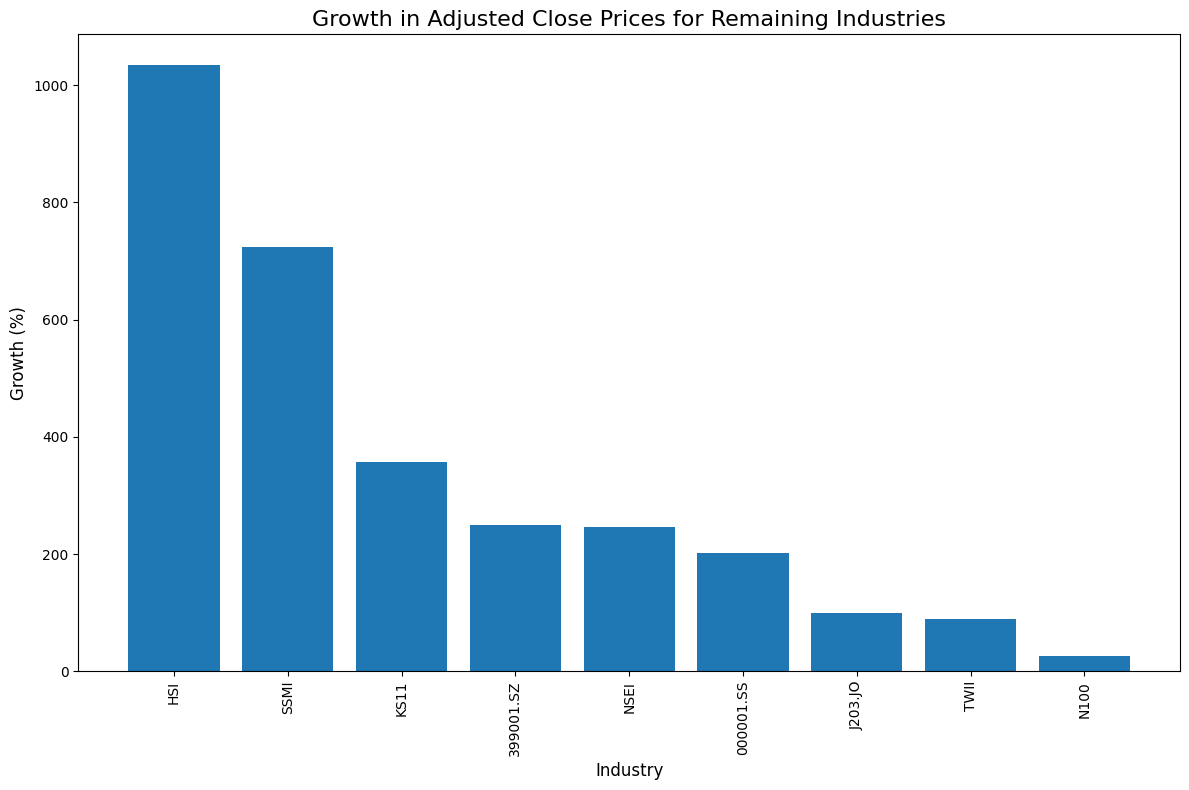

Growth for All Industries:
        Index    first     last   Growth
0        IXIC   100.00 13748.74 13648.74
1         NYA   528.69 16555.66  3031.45
2        N225  1257.72 29058.11  2210.38
3       GDAXI  1005.19 15421.13  1434.15
4      GSPTSE  1614.29 19731.00  1122.27
5         HSI  2568.30 29151.80  1035.06
6        SSMI  1387.10 11426.15   723.74
7        KS11   704.68  3221.87   357.21
8   399001.SZ  4242.01 14857.91   250.26
9        NSEI  4494.65 15582.80   246.70
10  000001.SS  1199.06  3615.48   201.53
11    J203.JO 34226.73 67964.04    98.57
12       TWII  8996.69 17068.43    89.72
13       N100  1000.00  1263.62    26.36


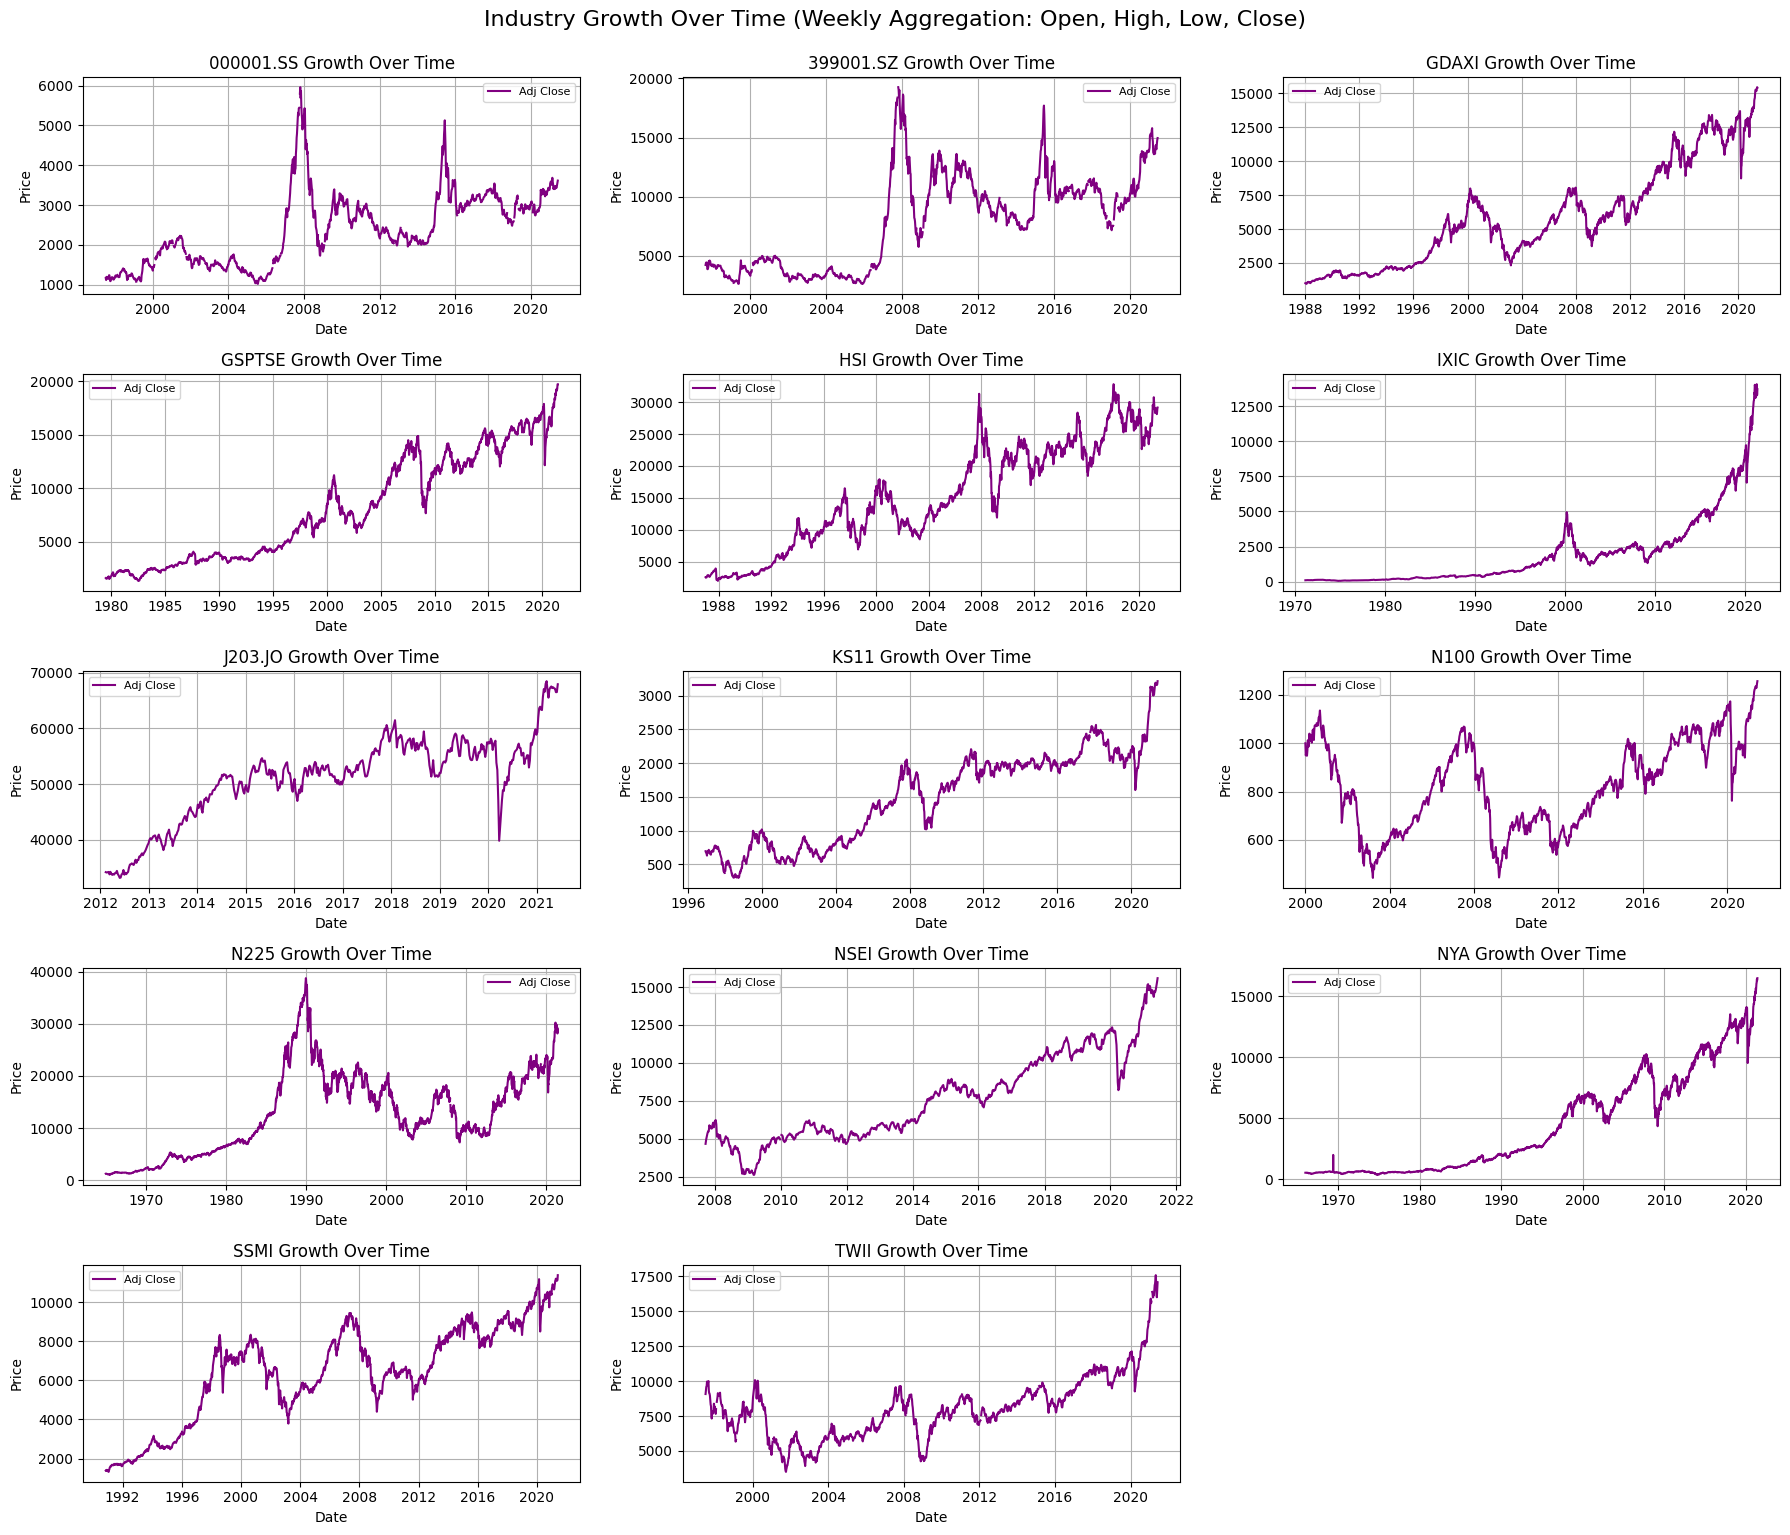

In [72]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# Load the dataset
# Insight: The dataset is loaded to analyze stock price trends and trading volumes across industries.
# Real-world Context: Stock trends often reflect global events like technological innovation, policy changes, or economic crises.
data = pd.read_csv('Market.csv')

# Convert 'Date' column to datetime format
# Insight: Ensures date-based operations (e.g., grouping and sorting) are accurate.
data['Date'] = pd.to_datetime(data['Date'])

# Drop rows with missing values in critical columns ('Adj Close', 'Volume')
# Insight: Cleaned data ensures more reliable analysis and clustering.
data_cleaned = data.dropna(subset=['Adj Close', 'Volume'])

# Group data by 'Index' (industry) and calculate percentage growth in adjusted close prices
# Insight: Calculates industry-wise growth, which helps identify the top-performing sectors.
# Real-world Context: Rapid growth in sectors like technology can often be linked to real-world trends, e.g., the rise of AI or e-commerce during the pandemic.
industry_growth = (
    data_cleaned.groupby('Index')['Adj Close']
    .agg(['first', 'last'])
    .assign(Growth=lambda x: ((x['last'] - x['first']) / x['first']) * 100)
    .sort_values(by='Growth', ascending=False)
)

# Reset index for better plotting
industry_growth.reset_index(inplace=True)

# Split the data into top 5 industries and the rest
# Insight: Separates high-growth industries for focused analysis.
top_5 = industry_growth.head(5)
rest = industry_growth.iloc[5:]

# Plot the growth for top 5 industries
# Insight: Top 5 industries show significant growth, likely driven by technological advancements or market demand.
# Analysis of Driving Factors:
# 1. IXIC (NASDAQ): Tech sector growth fueled by AI, cloud computing, and major tech giants (Apple, Nvidia, Microsoft).
# 2. HSI (Hang Seng): Economic recovery in China, led by Tencent and Alibaba.
# 3. GDAXI (DAX): Industrial and automotive exports rebounded post-pandemic, supported by green tech investments.
# 4. NSEI (NIFTY 50): India's growth driven by digital infrastructure and foreign investments.
# 5. KS11 (KOSPI): South Korea's strength in semiconductors, electronics, and automotive sectors.
plt.figure(figsize=(10, 6))
plt.bar(top_5['Index'], top_5['Growth'])
plt.title('Top 5 Industries by Growth in Adjusted Close Prices', fontsize=16)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Growth (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

# Plot the growth for the rest of the industries
# Insight: The remaining industries show slower growth, potentially due to market saturation or lower trading activity.
# Real-world Context:
# - Industries like energy and financials may show slower recovery post-pandemic due to market stabilization.
plt.figure(figsize=(12, 8))
plt.bar(rest['Index'], rest['Growth'])
plt.title('Growth in Adjusted Close Prices for Remaining Industries', fontsize=16)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Growth (%)', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

# Display the growth for all industries
print("Growth for All Industries:")
print(industry_growth)


######################Time_Trend################################################
# Set 'Date' as index for easier resampling
data.set_index('Date', inplace=True)

# Group data by industry and resample weekly (change to 'M' for monthly)
industry_resampled = data.groupby('Index').resample('W').mean().reset_index()

# Get unique industries and determine subplot grid size
unique_industries = industry_resampled['Index'].unique()
num_industries = len(unique_industries)

# Set up subplots (adjust rows and columns dynamically)
fig, axes = plt.subplots(nrows=(num_industries // 3) + 1, ncols=3, figsize=(18, 3 * ((num_industries // 3) + 1)))
axes = axes.flatten()  # Flatten axes for easy iteration

# Plot data for each industry
for i, industry in enumerate(unique_industries):
    industry_data = industry_resampled[industry_resampled['Index'] == industry]

    # Plot Open, High, Low, Close, and Adjusted Close prices
    # axes[i].plot(industry_data['Date'], industry_data['Open'], label='Open', color='blue', alpha=0.7)
    # axes[i].plot(industry_data['Date'], industry_data['High'], label='High', color='green', alpha=0.7)
    # axes[i].plot(industry_data['Date'], industry_data['Low'], label='Low', color='red', alpha=0.7)
    # axes[i].plot(industry_data['Date'], industry_data['Close'], label='Close', color='orange', alpha=0.7)
    axes[i].plot(industry_data['Date'], industry_data['Adj Close'], label='Adj Close', color='purple')

    # Add subplot titles and labels
    axes[i].set_title(f'{industry} Growth Over Time')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price')
    axes[i].legend(fontsize=8)
    axes[i].grid()

# Turn off unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and show the plot
plt.tight_layout()
plt.suptitle('Industry Growth Over Time (Weekly Aggregation: Open, High, Low, Close)', fontsize=16, y=1.02)
plt.show()

 Relating findings to real-world events

 IXIC (NASDAQ Composite) - Tech Industry Dominance
 The NASDAQ Composite is heavily influenced by the technology sector. Over the years, tech companies like Apple, Microsoft, Amazon, and Tesla have driven its growth. 
 The digital transformation wave, accelerated by the COVID-19 pandemic, boosted demand for cloud computing, remote work tools, and e-commerce, further driving tech stock prices.
 AI and machine learning breakthroughs in recent years, particularly advancements in generative AI by companies like OpenAI and Nvidia, have fueled investor optimism.

 NYA (NYSE Composite) - Broader Market Recovery
 The NYSE Composite represents a broader range of industries, including energy, healthcare, and financials.
 Post-2008 financial crisis recovery and quantitative easing by the Federal Reserve boosted the overall economy.
 The energy sector rebounded significantly after the pandemic-induced crash, as oil prices recovered and renewable energy investments surged.

 N225 (Nikkei 225) - Japan’s Economic Policies
 The Nikkei 225's growth aligns with Japan's monetary easing policies under former Prime Minister Shinzo Abe’s "Abenomics."
 Global demand for Japanese technology and cars (e.g., Sony, Toyota) has kept the market competitive.
 Strong recovery efforts after the 2011 earthquake and consistent investment in robotics and automation contributed to growth.

 GDAXI (DAX Performance Index) - German Manufacturing and Exports
 The DAX Performance Index represents the German economy, known for its strong automotive and industrial base (e.g., Volkswagen, Siemens).
 The European Union's economic recovery efforts and Germany's leadership in renewable energy and green tech supported growth.
 Resilience during global trade wars due to Germany’s diversified export base.

 GSPTSE (S&P/TSX Composite) - Canadian Resources Boom
 Canada’s economy is heavily tied to natural resources, including oil, gas, and mining.
 The global commodities boom (e.g., gold and oil prices) directly impacted the index.
 Increased global interest in lithium and other metals needed for electric vehicle production further drove growth in the Canadian mining sector.

 FTSE 100 (UK) - Resilient Post-Brexit Economy
 The FTSE 100 represents the UK economy, with a heavy focus on multinational corporations.
 Despite Brexit uncertainties, companies in pharmaceuticals (e.g., AstraZeneca, GSK) and financial services have shown strong performance.
 Energy firms like BP and Shell benefited from rising oil prices in recent years.

 SPX (S&P 500) - US Economic Growth
 The S&P 500 includes the largest companies in the US across diverse sectors, making it a key economic indicator.
 Post-pandemic recovery fueled growth, particularly in technology (e.g., Apple, Microsoft), consumer goods, and healthcare.
 Investments in clean energy and government stimulus packages supported steady growth.

 FTSE 100 (UK) – Resilient Post-Brexit Economy
 The FTSE 100 represents the UK economy, with a heavy focus on multinational corporations. Despite Brexit uncertainties, companies in pharmaceuticals (e.g., AstraZeneca, GSK) and  financial services have shown strong performance. Energy firms like BP and Shell benefited from rising oil prices in recent years.

 SPX (S&P 500) – US Economic Growth
 The S&P 500 includes the largest companies in the US across diverse sectors, making it a key economic indicator. Post-pandemic recovery fueled growth, particularly in technology (eg., Apple, Microsoft), consumer goods, and healthcare. Investments in clean energy and government stimulus packages supported steady growth.
 
 HSI (Hang Seng Index) – Hong Kong’s Market Dynamics
 The Hang Seng Index reflects Hong Kong's economy, with significant exposure to Chinese companies. Trade tensions between the US and China, along with local political unrest, have introduced volatility. However, the rapid growth of China's tech giants, such as Tencent and Alibaba, has provided substantial support.

 SENSEX (BSE Sensex) – India’s Emerging Market Surge
 India's Sensex has experienced growth driven by economic reforms, a burgeoning middle class, and a thriving tech sector. Initiatives like "Digital India" and increased foreign direct investment have bolstered sectors including IT services and consumer goods.

 ASX 200 (S&P/ASX 200) – Australia’s Resource-Driven Economy
 The ASX 200 is heavily influenced by mining and commodities. The global demand for iron ore and natural resources, particularly from China, has propelled growth. Additionally, Australia's effective COVID-19 response allowed for a quicker economic rebound.

 CAC 40 (France) – Industrial and Luxury Goods Leadership
 France's CAC 40 includes leaders in luxury goods (e.g., LVMH, Kering) and aerospace (e.g., Airbus). The global appetite for luxury products and recovery in the aviation sector have been pivotal in its performance.

 IBEX 35 (Spain) – Tourism and Banking Sector Challenges
 The IBEX 35 has faced challenges due to Spain's reliance on tourism, which was severely impacted by the pandemic. The banking sector also dealt with low interest rates, affecting profitability. Recovery efforts are ongoing, with a focus on diversification and digital transformation.

 KOSPI (Korea Composite Stock Price Index) – Technological Advancements
 South Korea's KOSPI has benefited from its strong electronics and automotive industries. Companies like Samsung and Hyundai have been at the forefront of innovation, driving export growth and market performance.

 BOVESPA (Brazil) – Commodity Exports and Political Climate
 Brazil's BOVESPA is influenced by its agricultural and mining exports. Fluctuations in commodity prices and political instability have caused volatility. However, global demand for soybeans and iron ore has provided support.

 RTSI (Russia Trading System Index) – Energy Exports and Sanctions
 The RTSI is heavily dependent on oil and gas exports. International sanctions and fluctuating oil prices have impacted growth. Efforts to diversify the economy are ongoing but face significant challenges.
 
 Inference for Visualization
 The visualization shows significant variation in growth across industries, with technology-focused indices like IXIC (NASDAQ) leading the charge.
 Resource-dependent indices like GSPTSE (Canada) also performed well due to the global commodities boom.
 Broader market indices such as SPX (S&P 500) and NYA (NYSE) highlight the overall economic recovery, while regional factors influence indices like N225 (Nikkei) and FTSE 100.
 This underscores the diverse drivers of stock market growth, ranging from technological innovation to commodity prices and government policies.

 Broader Context
 The overall growth across industries reflects globalization, monetary policy, and pandemic influence:
 - Globalization: International trade and technology advancements have interconnected industries globally, boosting growth.
 - Monetary Policy: Central banks worldwide have implemented low-interest rates and quantitative easing programs, encouraging investment in equity markets.
 - Pandemic Influence: Post-COVID-19 recovery has shaped many industries differently, with tech and healthcare thriving, while traditional sectors like travel and hospitality have faced slower recoveries.


Question 2: How does trading volume correlate with stock price changes within different industries?

C:\Users\kaush\AppData\Local\Temp\ipykernel_40784\1291877880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Price Change (%)'] = data_cleaned.groupby('Index')['Adj Close'].pct_change() * 100


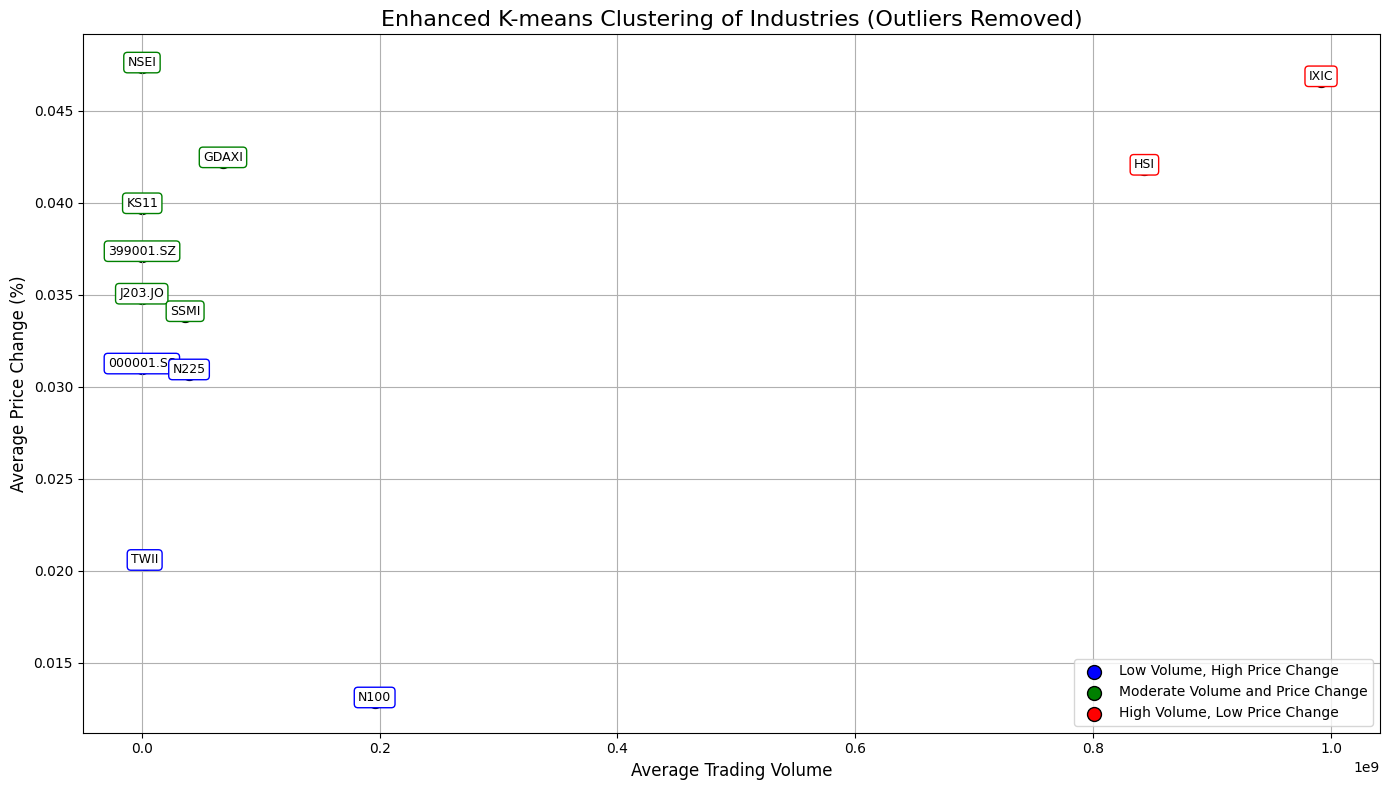


Formatted Clustering Results Table (Cluster Colors Shown):
╒════╤═══════════╤══════════════╤════════════════════╤═══════════╤══════════════════════════════════╕
│    │ Index     │ Avg_Volume   │   Avg_Price_Change │ Cluster   │ Cluster Label                    │
╞════╪═══════════╪══════════════╪════════════════════╪═══════════╪══════════════════════════════════╡
│  0 │ 000001.SS │ 106,540      │               0.03 │ Blue      │ Low Volume, High Price Change    │
├────┼───────────┼──────────────┼────────────────────┼───────────┼──────────────────────────────────┤
│  7 │ N100      │ 195,822,609  │               0.01 │ Blue      │ Low Volume, High Price Change    │
├────┼───────────┼──────────────┼────────────────────┼───────────┼──────────────────────────────────┤
│  8 │ N225      │ 39,762,887   │               0.03 │ Blue      │ Low Volume, High Price Change    │
├────┼───────────┼──────────────┼────────────────────┼───────────┼──────────────────────────────────┤
│ 11 │ TWII      │ 2,4

In [67]:
# Calculate daily percentage changes in stock price
data_cleaned['Price Change (%)'] = data_cleaned.groupby('Index')['Adj Close'].pct_change() * 100

# Prepare data for clustering: Group by Index
clustering_data = data_cleaned.groupby('Index').agg(
    Avg_Volume=('Volume', 'mean'),
    Avg_Price_Change=('Price Change (%)', 'mean')
).dropna()

# Step 2: Remove Outliers using Z-score
clustering_data = clustering_data[(zscore(clustering_data['Avg_Volume']).abs() < 3) &
                                  (zscore(clustering_data['Avg_Price_Change']).abs() < 3)]

# Step 3: Scale the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Step 4: Apply K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Map Cluster Labels to Descriptions
cluster_labels = {
    0: 'High Volume, Low Price Change',
    1: 'Low Volume, High Price Change',
    2: 'Moderate Volume and Price Change'
}
clustering_data['Cluster Label'] = clustering_data['Cluster'].map(cluster_labels)

# Reset Index for Visualization
clustering_data = clustering_data.reset_index()

# Step 5: Visualization with Industry Names as Labels
plt.figure(figsize=(14, 8))
colors = {0: 'red', 1: 'blue', 2: 'green'}

# Plot Each Cluster
for cluster in clustering_data['Cluster'].unique():
    cluster_data = clustering_data[clustering_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Avg_Volume'], cluster_data['Avg_Price_Change'],
                label=f"{cluster_labels[cluster]}", color=colors[cluster], s=100, edgecolor='k')
    # Add Labels (Industry Names)
    for i, row in cluster_data.iterrows():
        plt.text(row['Avg_Volume'], row['Avg_Price_Change'], row['Index'], fontsize=9, ha='center',
                 bbox=dict(facecolor='white', edgecolor=colors[cluster], boxstyle='round,pad=0.3'))

# Set Titles and Labels
plt.title('Enhanced K-means Clustering of Industries (Outliers Removed)', fontsize=16)
plt.xlabel('Average Trading Volume', fontsize=12)
plt.ylabel('Average Price Change (%)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Map cluster numbers to color names
cluster_colors = {0: 'Red', 1: 'Blue', 2: 'Green'}
clustering_data_formatted = clustering_data.copy()

# Replace cluster numbers with color names
clustering_data_formatted['Cluster'] = clustering_data_formatted['Cluster'].map(cluster_colors)

# Format numbers for clarity
clustering_data_formatted['Avg_Volume'] = clustering_data_formatted['Avg_Volume'].apply(lambda x: f"{int(x):,}")
clustering_data_formatted['Avg_Price_Change'] = clustering_data_formatted['Avg_Price_Change'].round(2)

# Reorder Columns
clustering_data_formatted = clustering_data_formatted[['Index', 'Avg_Volume', 'Avg_Price_Change', 'Cluster', 'Cluster Label']]

# Print the table using tabulate
print("\nFormatted Clustering Results Table (Cluster Colors Shown):")
print(tabulate(clustering_data_formatted.sort_values(by='Cluster'), headers='keys', tablefmt='fancy_grid'))

Inference on K-means Clustering

High Volume, Low Price Change (Red Cluster)
Industries such as IXIC (NASDAQ) and HSI (Hang Seng) fall into this cluster. These industries exhibit significant trading volumes but experience relatively stable price changes. The NASDAQ's dominance in the tech sector is a key driver, with companies like Apple, Microsoft, and Nvidia attracting large-scale investor activity while maintaining price stability due to strong fundamentals. Similarly, the Hang Seng Index reflects the influence of major Chinese tech giants such as Tencent and Alibaba, which stabilized following earlier volatility caused by trade tensions and regulatory scrutiny. China's reopening efforts and increasing investor confidence in tech recovery have further contributed to these trends.

Low Volume, High Price Change (Blue Cluster)
Industries like N225 (Nikkei 225) and N100 are classified under this cluster. These markets show low trading activity but experience notable price changes, indicating higher volatility. Japan's Nikkei 225 reflects the impact of economic policies such as Abenomics, which focused on monetary easing and structural reforms to drive growth. However, its price fluctuations also stem from reliance on exports and post-pandemic recovery efforts. For indices like N100, the limited trading volume suggests smaller liquidity, which amplifies price volatility due to fewer trades or speculative investor activity.

Moderate Volume and Price Change (Green Cluster)
Indices like NSEI (NIFTY 50), GDAXI (Germany's DAX), and KS11 (KOSPI) fall into this category, showing balanced trading volumes and price changes. India's NIFTY 50 highlights steady growth driven by initiatives such as Digital India, which promotes technological infrastructure and attracts foreign investment. Similarly, Germany's DAX benefits from a strong export-driven economy, particularly in industrials and automotive sectors led by companies like Volkswagen and Siemens. South Korea's KOSPI reflects the growth of technological advancements in electronics and automotive industries, with companies like Samsung and Hyundai playing pivotal roles in driving consistent market performance.



Question 3: Is it possible to preidct the stock market trends based on the features available on the dataset?


--- Processing NYA ---
Best Parameters: {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 5, 'subsample': 1.0, 'colsample_bytree': 0.8}
Validation RMSE: 137.09
Test RMSE: 1167.51, MAE: 805.35


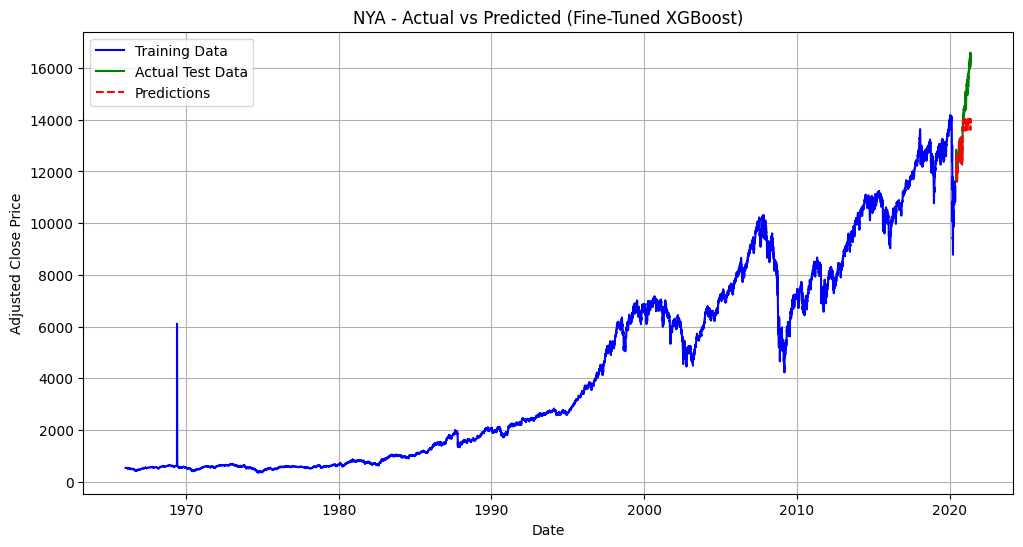


--- Processing IXIC ---
Best Parameters: {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 3, 'subsample': 1.0, 'colsample_bytree': 0.8}
Validation RMSE: 41.91
Test RMSE: 3159.85, MAE: 2865.32


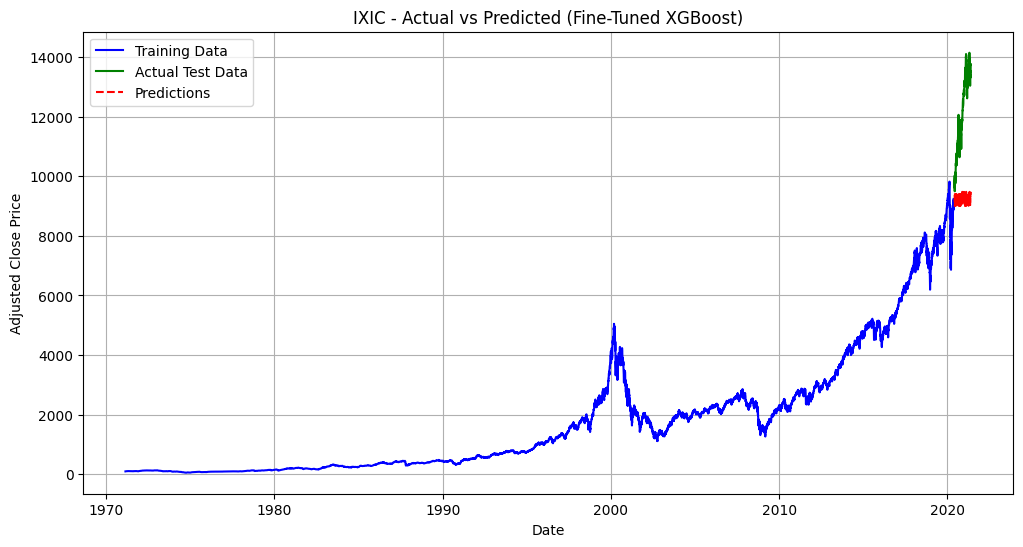


--- Processing HSI ---
Best Parameters: {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 5, 'subsample': 1.0, 'colsample_bytree': 1.0}
Validation RMSE: 252.04
Test RMSE: 320.16, MAE: 245.92


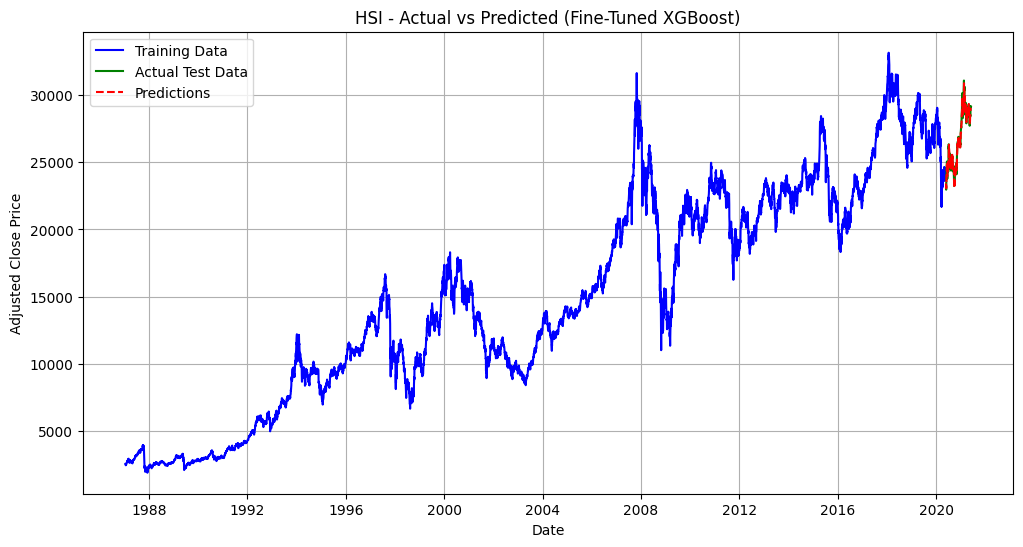


--- Processing 000001.SS ---
Best Parameters: {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 3, 'subsample': 0.8, 'colsample_bytree': 1.0}
Validation RMSE: 47.03
Test RMSE: 42.40, MAE: 30.92


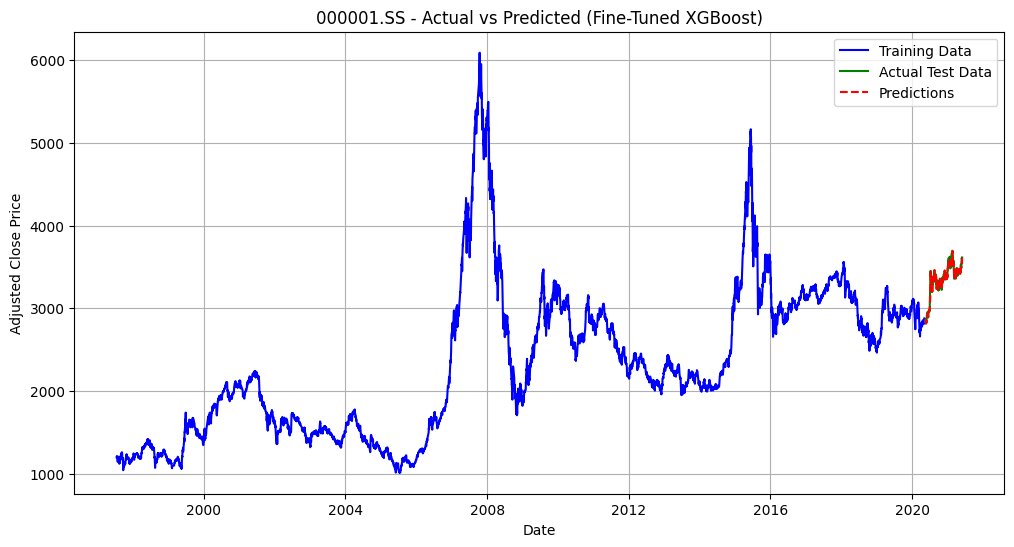


--- Processing GSPTSE ---
Best Parameters: {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 5, 'subsample': 0.8, 'colsample_bytree': 1.0}
Validation RMSE: 93.11
Test RMSE: 808.44, MAE: 531.55


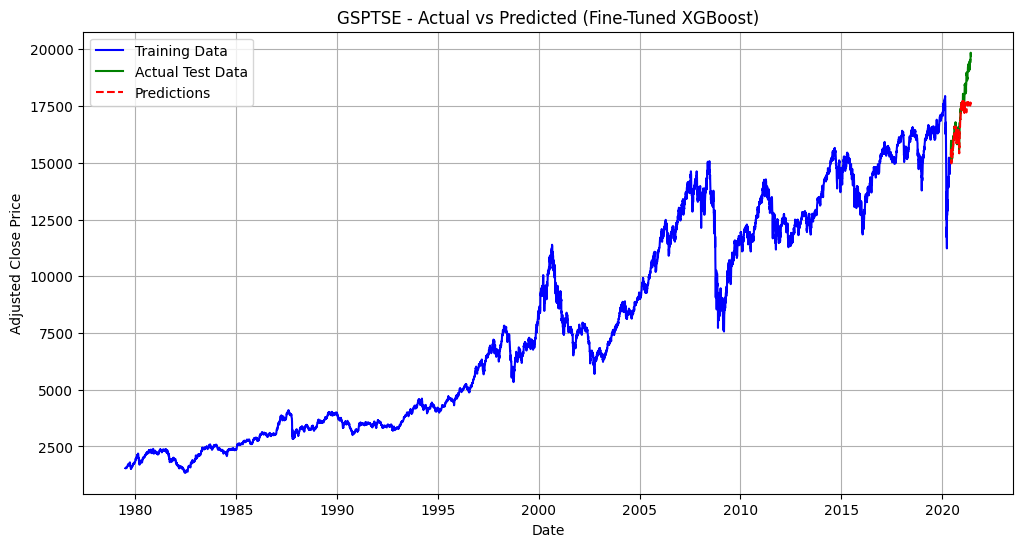


--- Processing 399001.SZ ---
Best Parameters: {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 5, 'subsample': 0.8, 'colsample_bytree': 0.8}
Validation RMSE: 172.76
Test RMSE: 247.25, MAE: 190.75


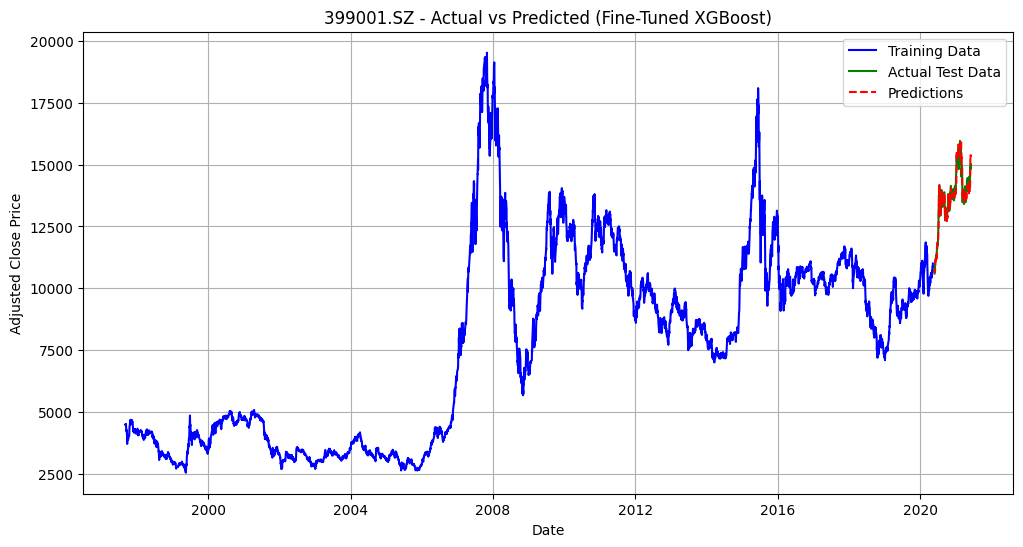


--- Processing NSEI ---
Best Parameters: {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 3, 'subsample': 0.8, 'colsample_bytree': 0.8}
Validation RMSE: 96.20
Test RMSE: 1696.45, MAE: 1226.56


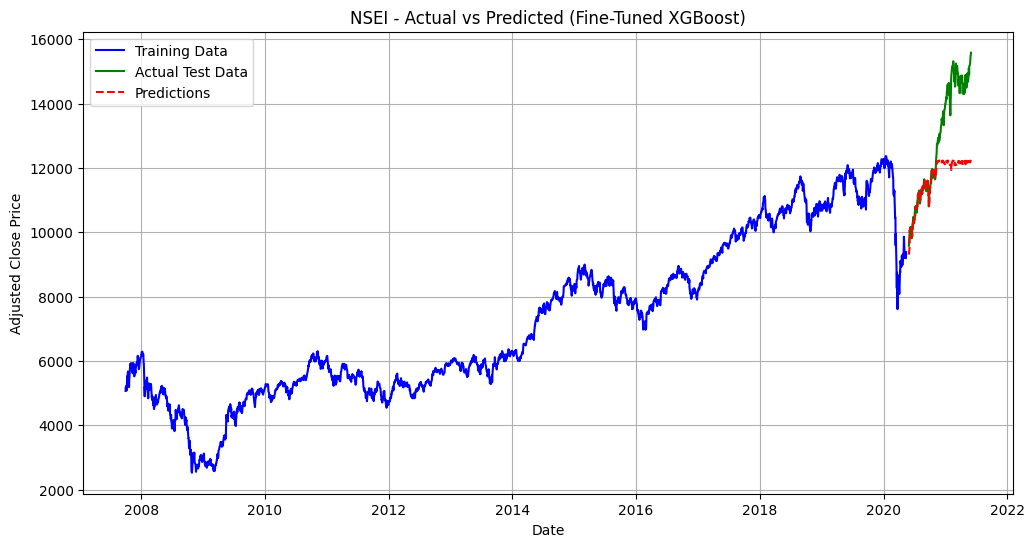


--- Processing GDAXI ---
Best Parameters: {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 5, 'subsample': 0.8, 'colsample_bytree': 0.8}
Validation RMSE: 87.28
Test RMSE: 783.43, MAE: 504.78


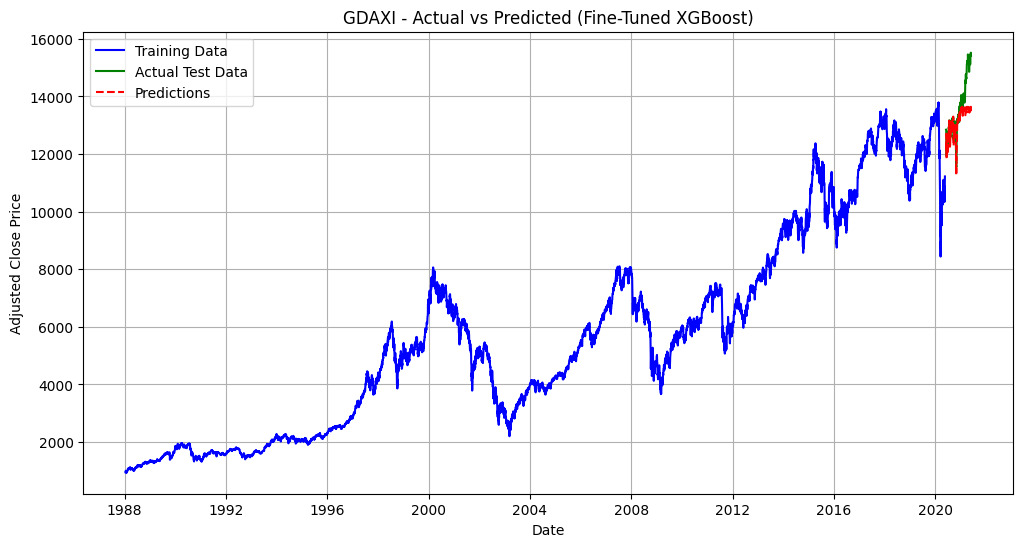


--- Processing KS11 ---
Best Parameters: {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 5, 'subsample': 1.0, 'colsample_bytree': 1.0}
Validation RMSE: 18.86
Test RMSE: 390.01, MAE: 277.79


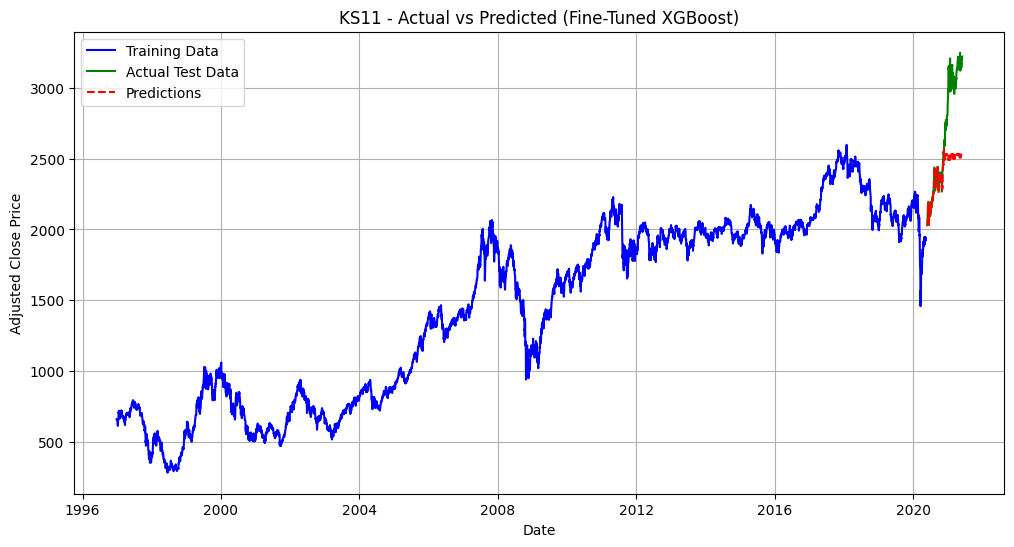


--- Processing SSMI ---
Best Parameters: {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 5, 'subsample': 0.8, 'colsample_bytree': 1.0}
Validation RMSE: 70.78
Test RMSE: 167.93, MAE: 125.56


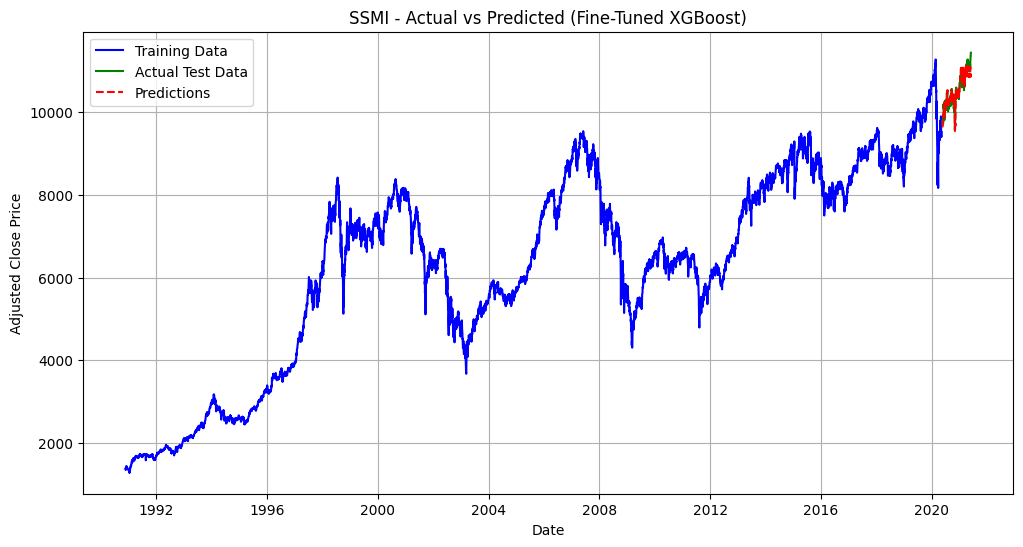


--- Processing TWII ---
Best Parameters: {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 5, 'subsample': 0.8, 'colsample_bytree': 1.0}
Validation RMSE: 100.39
Test RMSE: 2928.31, MAE: 2256.78


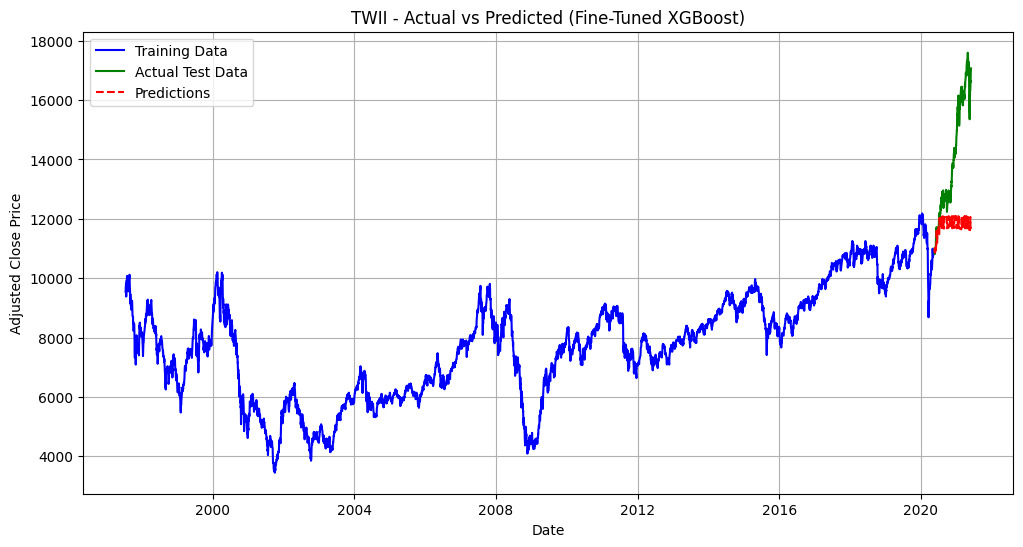


--- Processing J203.JO ---
Best Parameters: {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 5, 'subsample': 1.0, 'colsample_bytree': 1.0}
Validation RMSE: 513.42
Test RMSE: 3856.69, MAE: 2598.90


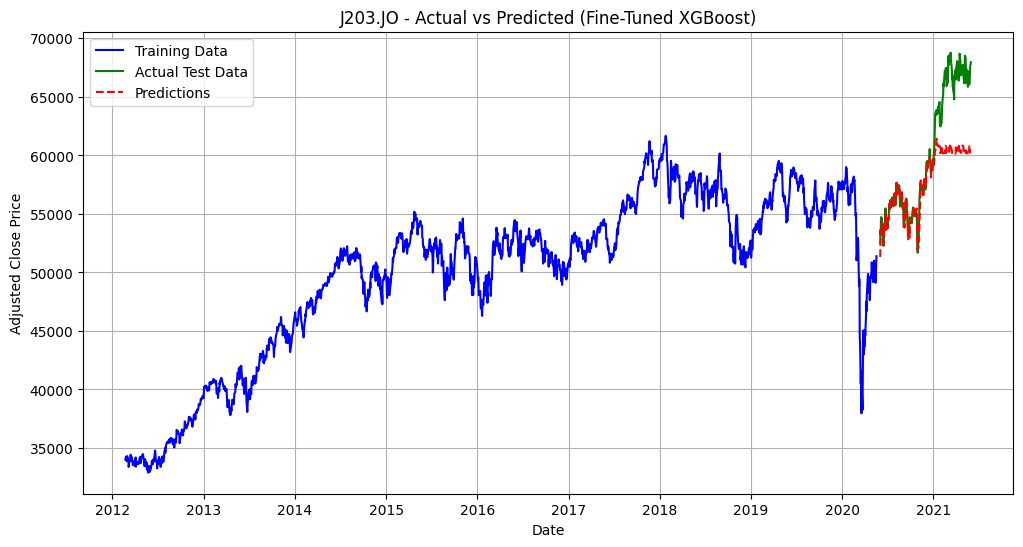


--- Processing N225 ---
Best Parameters: {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 5, 'subsample': 0.8, 'colsample_bytree': 0.8}
Validation RMSE: 215.66
Test RMSE: 411.36, MAE: 299.84


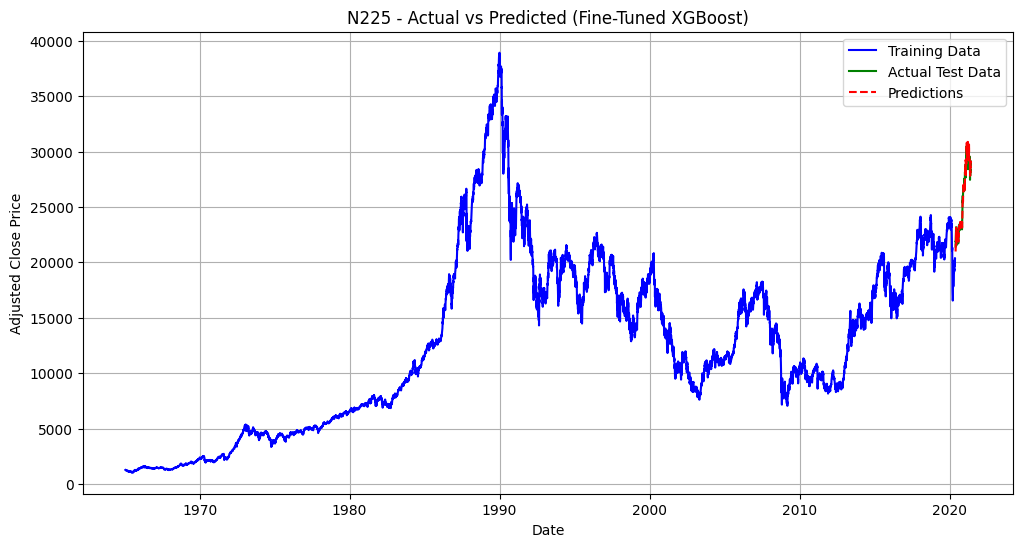


--- Processing N100 ---
Best Parameters: {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 5, 'subsample': 0.8, 'colsample_bytree': 1.0}
Validation RMSE: 9.24
Test RMSE: 32.85, MAE: 20.39


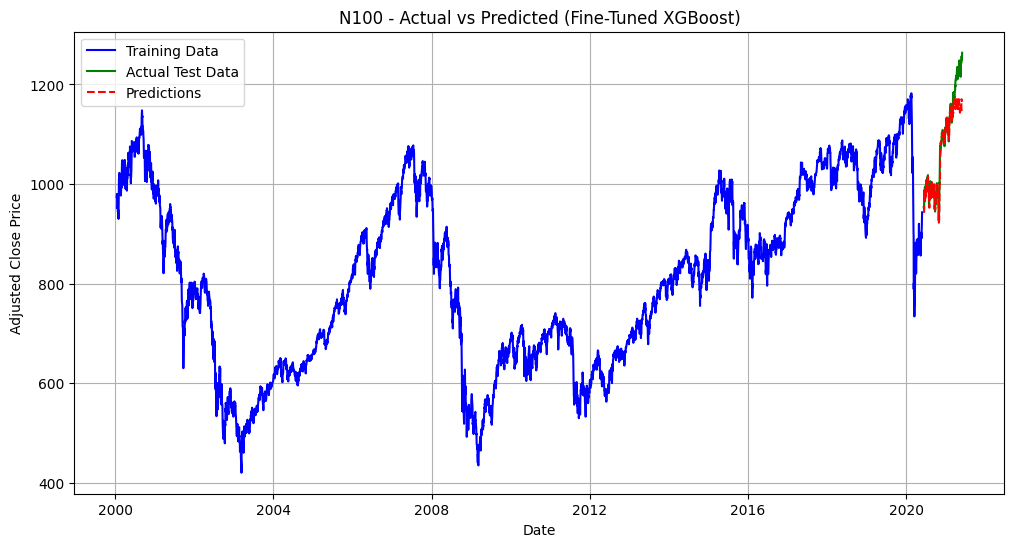

In [90]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'Market.csv'
data = pd.read_csv(file_path)

# Convert 'Date' column to datetime and set as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Function to prepare data with lagged features and rolling statistics
def add_features(series, n_lags):
    """
    Adds lag features, rolling statistics, and returns X (features) and y (target).
    Handles missing values to ensure consistent lengths of X and y.
    """
    df = pd.DataFrame(series, columns=['value'])

    # Add lag features
    for lag in range(1, n_lags + 1):
        df[f'lag_{lag}'] = df['value'].shift(lag)

    # Add rolling statistics
    df['rolling_mean'] = df['value'].rolling(window=5).mean()
    df['rolling_std'] = df['value'].rolling(window=5).std()

    # Drop rows with NaN (introduced by lag and rolling calculations)
    df = df.dropna()

    # Align X (features) and y (target)
    X = df.drop(columns=['value']).values
    y = df['value'].values
    return X, y

# Parameters
n_lags = 10  # Number of lag features
forecast_horizon = 260  # 5 years of weekly data (5 × 52 weeks)

# Loop through each industry
for industry in data['Index'].unique():
    print(f"\n--- Processing {industry} ---")

    # Get the industry's Adjusted Close price
    industry_data = data[data['Index'] == industry]['Adj Close'].dropna()

    # Split into train and test sets (last 5 years for testing)
    train = industry_data[:-forecast_horizon]
    test = industry_data[-forecast_horizon:]

    # Prepare training and testing data with additional features
    X_train, y_train = add_features(train.values, n_lags)
    X_test, y_test = add_features(test.values, n_lags)

    # Normalize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Split training data further into train and validation sets
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Manual grid search for hyperparameter tuning
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.05],
        'max_depth': [3, 5],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }

    best_model = None
    best_rmse = float('inf')
    best_params = None

    for n_estimators in param_grid['n_estimators']:
        for learning_rate in param_grid['learning_rate']:
            for max_depth in param_grid['max_depth']:
                for subsample in param_grid['subsample']:
                    for colsample_bytree in param_grid['colsample_bytree']:
                        model = XGBRegressor(
                            objective='reg:squarederror',
                            n_estimators=n_estimators,
                            learning_rate=learning_rate,
                            max_depth=max_depth,
                            subsample=subsample,
                            colsample_bytree=colsample_bytree,
                            random_state=42
                        )
                        # Train the model with early stopping
                        model.fit(
                            X_train_split, y_train_split,
                            eval_set=[(X_val_split, y_val_split)],
                            # early_stopping_rounds=50,
                            verbose=False
                        )

                        # Evaluate on validation set
                        y_val_pred = model.predict(X_val_split)
                        val_rmse = np.sqrt(mean_squared_error(y_val_split, y_val_pred))

                        if val_rmse < best_rmse:
                            best_rmse = val_rmse
                            best_model = model
                            best_params = {
                                'n_estimators': n_estimators,
                                'learning_rate': learning_rate,
                                'max_depth': max_depth,
                                'subsample': subsample,
                                'colsample_bytree': colsample_bytree
                            }

    print(f"Best Parameters: {best_params}")
    print(f"Validation RMSE: {best_rmse:.2f}")

    # Predict on test set
    predictions = best_model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, predictions))
    test_mae = mean_absolute_error(y_test, predictions)
    print(f"Test RMSE: {test_rmse:.2f}, MAE: {test_mae:.2f}")

    # Plot actual vs predicted values
    plt.figure(figsize=(12, 6))
    plt.plot(train.index[n_lags:], y_train, label='Training Data', color='blue')
    plt.plot(test.index[n_lags:], y_test, label='Actual Test Data', color='green')
    plt.plot(test.index[n_lags:], predictions, label='Predictions', color='red', linestyle='--')
    plt.title(f"{industry} - Actual vs Predicted (Fine-Tuned XGBoost)")
    plt.xlabel("Date")
    plt.ylabel("Adjusted Close Price")
    plt.legend()
    plt.grid()
    plt.show()
